# 1) Solving the travelling salesman problem (TSP) for 7 cities

### Number of cities

In [29]:
n = 8

n =  8


### Distance between cities

In [30]:
function d = distanceMatrixCities(n)

    d = 100*rand(n);

    ## Fill diagonal with zeros
    i = 1;
    
    while(i<=n)
        d(i,i) = 0;
        i++;
    end
    
end

d = distanceMatrixCities(n)

d =

 Columns 1 through 7:

    0.00000    8.03862   18.96848   46.87270   26.53700   76.87115   47.35662
   51.47378    0.00000   74.45442   73.04837   60.08525   11.13604   42.56520
   23.17845   96.09046    0.00000   17.57102   49.71593   34.44920   76.23499
   93.62938   51.53094   25.75255    0.00000   44.92049   82.84342   21.10356
   86.46162   53.45992   12.62885   64.12093    0.00000   96.66680    3.25191
   74.49604   91.17947   63.15880   41.16031   84.01228    0.00000   46.29793
   41.86304   75.90639   68.22059   75.81477   66.99906   70.43244    0.00000
   16.56123   84.20755   92.24162   16.38301   97.13923    2.97020   13.85813

 Column 8:

   51.49975
   32.99680
   56.66234
   25.72297
   22.68413
   31.69100
   67.78059
    0.00000



## a) Initial population

### Population

In [31]:
pop = perms([1:n]);

In [32]:
size(pop)(1)

ans =  40320


In [33]:
totalPop = pop;

### Size of the initial population for the genetic algorithm

In [34]:
sizeSubPop = 10 

sizeSubPop =  10


### Pick individuals from the total population randomly to create a generation

In [35]:
function subPop = createSubPopulation(totalPop,sizeSubPop)

    subPop = totalPop(randi(size(totalPop)(1),sizeSubPop,1),:);

end

generation0 = createSubPopulation(totalPop,sizeSubPop)


generation0 =

   1   2   4   8   7   5   6   3
   7   1   4   2   6   3   5   8
   3   4   1   2   5   7   8   6
   2   7   6   4   3   8   1   5
   8   4   2   7   1   6   3   5
   6   7   3   1   8   5   4   2
   2   5   4   8   6   3   1   7
   7   2   4   3   8   6   5   1
   5   1   3   6   4   8   7   2
   4   6   5   2   8   3   7   1



## b) Fitness calculation

### Total distance for all possible sequence of cities

In [36]:
function individuals = distanceCalculation(pop,d)
    
    daccs = zeros([size(pop)(1),size(pop)(2)+1]);

        for i = 1:(size(pop)(1))
            dacc = 0;

            for j = 1:(size(pop)(2)-1)
                dacc += d(pop(i,j),pop(i,j+1));
            end

            daccs(i,:) = [pop(i,:),dacc];
            
        end
    
    individuals{1} = pop;
    individuals{2} = daccs(:,size(daccs)(2));

end



In [37]:
## The first position of the array has the sequence of cities and the second position the total distance between cities
generation0 = distanceCalculation(pop = generation0,d = d)

generation0 =
{
  [1,1] =

     1   2   4   8   7   5   6   3
     7   1   4   2   6   3   5   8
     3   4   1   2   5   7   8   6
     2   7   6   4   3   8   1   5
     8   4   2   7   1   6   3   5
     6   7   3   1   8   5   4   2
     2   5   4   8   6   3   1   7
     7   2   4   3   8   6   5   1
     5   1   3   6   4   8   7   2
     4   6   5   2   8   3   7   1

  [1,2] =

     347.49
     286.96
     253.33
     279.67
     342.09
     401.99
     286.59
     404.81
     296.53
     463.65

}



### Fitness function

In [38]:
function individuals = fitness(individuals)

    individuals{3} = individuals{2};

    for i=1:size(individuals{1})(1)

        individuals{3}(i,1) = 1/individuals{2}(i);

    end 

end

In [39]:
#The third position of the array includes the fitness of each individual
generation0 = fitness(generation0)

generation0 =
{
  [1,1] =

     1   2   4   8   7   5   6   3
     7   1   4   2   6   3   5   8
     3   4   1   2   5   7   8   6
     2   7   6   4   3   8   1   5
     8   4   2   7   1   6   3   5
     6   7   3   1   8   5   4   2
     2   5   4   8   6   3   1   7
     7   2   4   3   8   6   5   1
     5   1   3   6   4   8   7   2
     4   6   5   2   8   3   7   1

  [1,2] =

     347.49
     286.96
     253.33
     279.67
     342.09
     401.99
     286.59
     404.81
     296.53
     463.65

  [1,3] =

     0.0028778
     0.0034848
     0.0039475
     0.0035756
     0.0029232
     0.0024876
     0.0034893
     0.0024703
     0.0033724
     0.0021568

}



## c) Choosing parents to create the next generation of individuals

In [40]:
function [individuals,parents] = chooseParents(individuals)

    individuals{4} = individuals{3};

    individualsCopy = individuals;

    #probParent = individuals{3}/sum(individuals{3})

    #First best-fitted individual

    [maxVal1,maxIndex1] = max(individuals{3});

    #Second best-fitted individual
    individualsCopy{3}(maxIndex1) = -1*individualsCopy{3}(maxIndex1);
    [maxVal2,maxIndex2] = max(individualsCopy{3});

    #Create a column with binary variables that takes the value 1 if the individual is parent or zero, otherwise. 
    individuals{4}=zeros(size(individuals{1})(1),1);

    individuals{4}(maxIndex1) = 1;
    individuals{4}(maxIndex2) = 1;

end

In [41]:
#The fourth position of the array shows which individuals were selected as parents
chooseParents(generation0)

ans =
{
  [1,1] =

     1   2   4   8   7   5   6   3
     7   1   4   2   6   3   5   8
     3   4   1   2   5   7   8   6
     2   7   6   4   3   8   1   5
     8   4   2   7   1   6   3   5
     6   7   3   1   8   5   4   2
     2   5   4   8   6   3   1   7
     7   2   4   3   8   6   5   1
     5   1   3   6   4   8   7   2
     4   6   5   2   8   3   7   1

  [1,2] =

     347.49
     286.96
     253.33
     279.67
     342.09
     401.99
     286.59
     404.81
     296.53
     463.65

  [1,3] =

     0.0028778
     0.0034848
     0.0039475
     0.0035756
     0.0029232
     0.0024876
     0.0034893
     0.0024703
     0.0033724
     0.0021568

  [1,4] =

     0
     0
     1
     1
     0
     0
     0
     0
     0
     0

}



In [42]:
function parents = createParents(individuals)

individuals = chooseParents(individuals);

parents = {:};

count = 1;

for i = 1:size(individuals{4})(1)

    if individuals{4}(i) == 1

    parents{1}(count,:) = individuals{1}(i,:);
    parents{2}(count,:) = individuals{2}(i,:);
    parents{3}(count,:) = individuals{3}(i,:);
    
    count++;

    end

end


end

In [43]:
#This array includes information on the parents selected from generation 0 (1: sequence of cities, 2: total distance, 3: fitness)
parentsG0 = createParents(generation0)

parentsG0 =
{
  [1,1] =

     3   4   1   2   5   7   8   6
     2   7   6   4   3   8   1   5

  [1,2] =

     253.33
     279.67

  [1,3] =

     0.0039475
     0.0035756

}



## d) Crossover

### Check if a gene (city) exist in a chromosome (sequence of cities)

In [44]:
function geneExist = containGene(child,gene)

    geneExist = false;

    for i=1:length(child)

        if child(i) == gene

            geneExist = true;

        end

    end

end

### Crossover between the two parents

In [45]:
function child = crossover(parents)


    nParents = size(parents{1})(1);
    chromosomeSize = size(parents{1})(2);

    %Select a random crossover point
    indexCO = randi([2,chromosomeSize],1,1);

    %Select the parent (parentChromosome1) that is used to start the crossover
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);

    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end

    child = chromosomeParent1;

    #Genes from parent 1
    for i=1:length(child)

        if i < indexCO
            child(i) = 0;
        end

    end

    #Genes from parent 2
    genePosition = 1;
    for i=1:(indexCO-1)

        implant = false;

        while implant == false 
            geneExist = containGene(child,chromosomeParent2(genePosition));

            if geneExist == true
                genePosition++;
                implant = false;

            else
                child(i) = chromosomeParent2(genePosition);
                implant = true;
                genePosition++;
            end

        end

    end
    
end

In [46]:
childG0 = crossover(parentsG0)

childG0 =

   4   3   1   2   5   7   8   6



## e) Mutation

In [47]:
function child = mutation(child, pm)
    
    childCopy = child;
    chromosomeSize = length(child);

    %Select two random mutation points
    indexM1 = randi([1,chromosomeSize],1,1);
    indexM2 = randi([1,chromosomeSize],1,1);
    
    %Mutation is done with a 'pm'% chance
    mutationProbThreshold = rand(1);
    
    if mutationProbThreshold <= pm
    
        childCopy(indexM1) = child(indexM2);
        childCopy(indexM2) = child(indexM1);
        
    end
    
    child = childCopy;

end

In [48]:
childG0
childG0 = mutation(childG0, pm = 0.5) # Mutation with a 50% probability

childG0 =

   4   3   1   2   5   7   8   6

childG0 =

   4   3   1   2   5   7   8   6



## f) Next Generation  (replacement)

### Size of the next generation 

In [49]:
sizeGeneration = 1*size(generation0{1})(1)

sizeGeneration =  10


### Check if the child exists in a generation

In [50]:
function childExist = containChild(child,children)
    
    childExist = false;
    
    for i=1:size(children)(1)
    
        counterEqualGenes = 0;
        
        for j= 1:length(children(i,:))
        
            if children(i,:)(j) == child(j)
                counterEqualGenes++;
            end
     
        end
        
        if counterEqualGenes == length(child)
            childExist = true;
        end


    end

end

### Function to create the next generations of individuals

In [51]:
function generations = createNewGeneration(nGenerations,sizeGeneration,individuals,d,pm)
    
    
    #This process is iteratively repeated for each generation
    generations = {:};
    
    t=cputime;
    
    for i=1:nGenerations      
        
        
        
        individuals = distanceCalculation(individuals{1},d);

        individuals = fitness(individuals);

        parents = createParents(individuals);

        child = crossover(parents);

        child = mutation(child,pm);
        
        if i == 1
            
            #Information about the new generation
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
            
        end
               
        if i > 1
        
            #This process is repeated until reaching the number of individuals in a generation
            newGeneration = {:};
        
            %newGeneration{2} = zeros(sizeGeneration,length(child));

            newGeneration{1}(1,:) = child;

            for j=1:sizeGeneration

                 newChild = mutation(crossover(parents),pm);

                 #Children are all different
                 while(containChild(child = newChild, children = newGeneration{1}))

                     newChild = mutation(crossover(parents),pm);

                 end

                 newGeneration{1}(j,:) = newChild;

            end

            #Information about the new generation
            individuals  = distanceCalculation(newGeneration{1},d);
            individuals = fitness(individuals);
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
        
        end
        

        


        
    end

end

# 2) Analyses

## Initial generation

In [52]:
createNewGeneration(nGenerations = 1, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2)

ans =
{
  [1,1] =
  {
    [1,1] =

       1   2   4   8   7   5   6   3
       7   1   4   2   6   3   5   8
       3   4   1   2   5   7   8   6
       2   7   6   4   3   8   1   5
       8   4   2   7   1   6   3   5
       6   7   3   1   8   5   4   2
       2   5   4   8   6   3   1   7
       7   2   4   3   8   6   5   1
       5   1   3   6   4   8   7   2
       4   6   5   2   8   3   7   1

    [1,2] =

       347.49
       286.96
       253.33
       279.67
       342.09
       401.99
       286.59
       404.81
       296.53
       463.65

    [1,3] =

       0.0028778
       0.0034848
       0.0039475
       0.0035756
       0.0029232
       0.0024876
       0.0034893
       0.0024703
       0.0033724
       0.0021568

    [1,4] =  253.33
    [1,5] =  0.0062550
  }

}



## First generation

In [53]:
generation01 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.2);

In [54]:
generation01{2}

ans =
{
  [1,1] =

     3   4   2   7   6   8   1   5
     2   7   6   4   3   8   1   5
     4   2   7   6   3   8   1   5
     4   3   1   2   5   7   8   6
     3   4   2   7   8   6   1   5
     3   4   1   2   5   7   8   6
     3   4   1   2   7   8   6   5
     1   7   4   3   2   5   8   6
     3   7   6   4   2   8   1   5
     2   7   4   3   8   1   5   6

  [1,2] =

     256.89
     279.67
     327.45
     191.06
     283.45
     253.33
     316.57
     330.75
     315.45
     340.56

  [1,3] =

     0.0038927
     0.0035756
     0.0030539
     0.0052340
     0.0035279
     0.0039475
     0.0031589
     0.0030234
     0.0031700
     0.0029363

  [1,4] =  191.06
  [1,5] =  0.080918
}



## Second generation

In [55]:
generation12 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation01{2}, d = d, pm = 0.8);

In [56]:
generation12{2}

ans =
{
  [1,1] =

     4   3   1   2   5   7   8   6
     3   4   1   2   5   6   8   7
     2   4   1   3   5   7   8   6
     3   4   1   2   5   7   8   6
     4   3   1   2   8   7   5   6
     3   4   7   2   5   1   8   6
     4   3   8   2   5   7   1   6
     8   3   1   2   5   7   4   6
     3   4   8   2   5   7   1   6
     4   3   1   7   5   2   8   6

  [1,2] =

     191.06
     321.54
     309.36
     253.33
     267.49
     315.60
     348.69
     345.45
     309.57
     252.71

  [1,3] =

     0.0052340
     0.0031100
     0.0032324
     0.0039475
     0.0037385
     0.0031686
     0.0028678
     0.0028947
     0.0032303
     0.0039570

  [1,4] =  191.06
  [1,5] =  0.051881
}



## 4 generations (generation 0, 1, 2 and 3)

In [57]:
generations1234 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = generation0, d = d, pm = 0.8);
generations1234

generations1234 =
{
  [1,1] =
  {
    [1,1] =

       1   2   4   8   7   5   6   3
       7   1   4   2   6   3   5   8
       3   4   1   2   5   7   8   6
       2   7   6   4   3   8   1   5
       8   4   2   7   1   6   3   5
       6   7   3   1   8   5   4   2
       2   5   4   8   6   3   1   7
       7   2   4   3   8   6   5   1
       5   1   3   6   4   8   7   2
       4   6   5   2   8   3   7   1

    [1,2] =

       347.49
       286.96
       253.33
       279.67
       342.09
       401.99
       286.59
       404.81
       296.53
       463.65

    [1,3] =

       0.0028778
       0.0034848
       0.0039475
       0.0035756
       0.0029232
       0.0024876
       0.0034893
       0.0024703
       0.0033724
       0.0021568

    [1,4] =  253.33
    [1,5] =  0.0060220
  }

  [1,2] =
  {
    [1,1] =

       2   5   6   4   3   8   1   7
       4   2   7   6   3   8   1   5
       6   4   2   7   3   8   1   5
       3   4   2   1   5   7   8   6
       3   4   1   2 

# 3) Computational time, generations and optimality

#### Optimal value

In [58]:
function [opt,t]=OptimalDistanceCalculation(pop,d)

    t=cputime;

    opt = min(distanceCalculation(pop,d){2});

    t = cputime-t;

end

In [59]:
[optimalDistance, cputime] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistance =  124.16
cputime =  9.0874


#### Plot computational time and optimality

In [60]:
function OptimalityAndGenerations = tableOptimalityAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)

    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);

    OptimalityAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        OptimalityAndGenerations(count,1) = i;
        OptimalityAndGenerations(count,2) = newGenerations{i}{4};
        count++;

    end

end

In [61]:
OptimalityAndGenerations18 = tableOptimalityAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = individuals, d = d, pm = 0.5)

OptimalityAndGenerations18 =

     1.0000   253.3270
     2.0000   191.0576
     3.0000   188.6602
     4.0000   135.7234
     5.0000   135.7234
     6.0000   135.7234
     7.0000   135.7234
     8.0000   135.7234



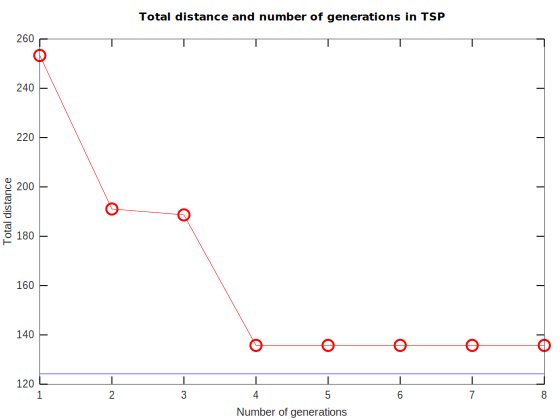

In [62]:
plot([OptimalityAndGenerations18(:,1)], [OptimalityAndGenerations18(:,2)], 'o-r');
title ("Total distance and number of generations in TSP");
xlabel ("Number of generations");
ylabel ("Total distance");
hold on;
plot([min(OptimalityAndGenerations18(:,1)),max(OptimalityAndGenerations18(:,1))],[optimalDistance,optimalDistance], 'b')
hold off;

#### Plot computational time and number of generations

In [63]:
function CPUTimeAndGenerations = tableCPUTimeAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)
    
    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);
    
    CPUTimeAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        CPUTimeAndGenerations(count,1) = i;
        CPUTimeAndGenerations(count,2) = newGenerations{i}{5};
        count++;

    end

end

In [64]:
CPUTimeAndGenerations18 = tableCPUTimeAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = individuals, d = d, pm = 0.5)

CPUTimeAndGenerations18 =

   1.0000000   0.0069990
   2.0000000   0.0941830
   3.0000000   0.1637720
   4.0000000   0.2632720
   5.0000000   0.4962350
   6.0000000   0.6377690
   7.0000000   0.7548650
   8.0000000   0.9269670



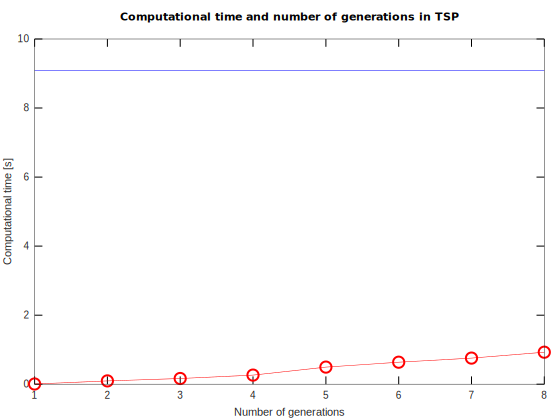

In [65]:
plot([CPUTimeAndGenerations18(:,1)], [CPUTimeAndGenerations18(:,2)], 'o-r');
title ("Computational time and number of generations in TSP");
xlabel ("Number of generations");
ylabel ("Computational time [s]");
hold on;
plot([min(CPUTimeAndGenerations18(:,1)),max(CPUTimeAndGenerations18(:,1))],[cputime,cputime], 'b')
hold off;